In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
file_path = r"https://raw.githubusercontent.com/ajayt0m/Ensemble-Techniques/main/Pistachio_28_Features_Dataset.xlsx"

pistachio_df = pd.read_excel(file_path)

In [3]:
X = pistachio_df.iloc[:,:-1]
y = pistachio_df.iloc[:,-1]

In [24]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=36)

In [26]:
# Create an AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners
    learning_rate=1,  # Learning rate
    algorithm='SAMME.R'  # Default algorithm
)

In [27]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [28]:
ada_classifier.feature_importances_

array([0.  , 0.02, 0.  , 0.06, 0.  , 0.04, 0.02, 0.02, 0.02, 0.02, 0.  ,
       0.02, 0.04, 0.  , 0.02, 0.04, 0.06, 0.04, 0.02, 0.22, 0.02, 0.02,
       0.06, 0.06, 0.  , 0.02, 0.12, 0.04])

In [29]:
pistachio_df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [30]:
y_pred = ada_classifier.predict(X_test)

In [31]:
# Reverse label encoding for predictions
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

In [32]:
y_pred_original

array(['Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', '

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_original,y_pred_original)

array([[308,  24],
       [ 34, 171]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_original,y_pred_original)

0.8919925512104283

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(ada_classifier,X_train,y_train,cv=10)

array([0.92592593, 0.88819876, 0.8757764 , 0.89440994, 0.89440994,
       0.91304348, 0.95652174, 0.9378882 , 0.8757764 , 0.91925466])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_original,y_pred_original))

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.90      0.93      0.91       332
  Siirt_Pistachio       0.88      0.83      0.85       205

         accuracy                           0.89       537
        macro avg       0.89      0.88      0.88       537
     weighted avg       0.89      0.89      0.89       537



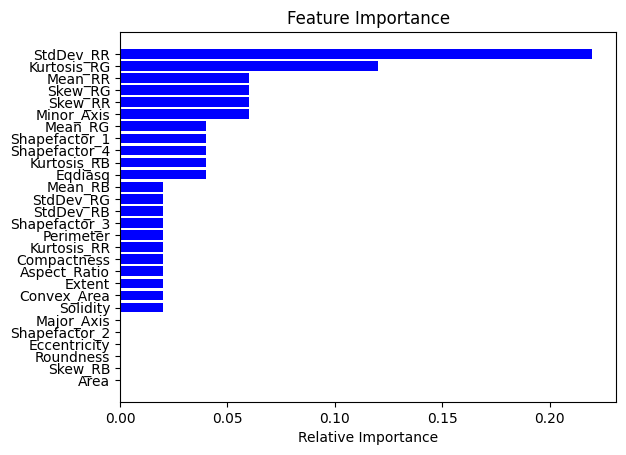

In [37]:
import numpy as np

features = pistachio_df.columns
importance = ada_classifier.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
# Calculate AUC
y_pred_proba = ada_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("\nAUC:", auc)


AUC: 0.9577799000881574


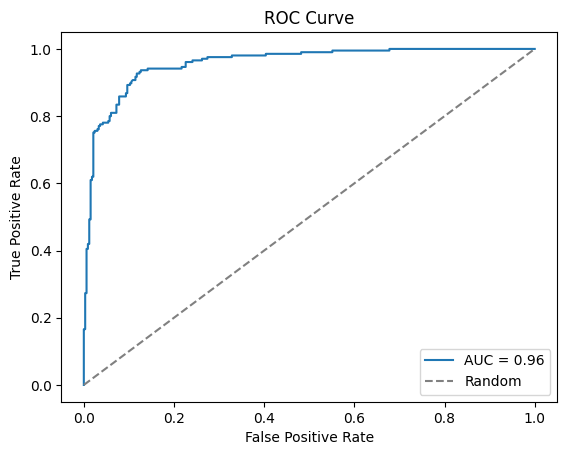

In [39]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()